In [8]:
import pandas as pd
import os
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


**Loading The Data**

In [4]:
current_dir = os.getcwd() 
relative_path = os.path.join('..', '..','data', 'train.csv')
train_data = pd.read_csv(os.path.join(current_dir, relative_path))

In [5]:
relative_path = os.path.join('..', '..','data', 'test.csv')
test_data = pd.read_csv(os.path.join(current_dir, relative_path))

In [6]:
x_train = train_data.drop(["Attrition"], axis = 1)
y_train = train_data["Attrition"]

x_test = test_data.drop(["Attrition"], axis = 1)
y_test = test_data["Attrition"]

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

**Trying Different Class Weights**

In [11]:
class_weights = [[1,1], [1,5], [1,10], [1,15], [1,20]]
for class_weight in class_weights:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': class_weight  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    print("For Class Weights :", class_weight)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print('-----------------------------------------------------')

For Class Weights : [1, 1]
Average Accuracy: 0.8704597701149426
Average F1 Score: 0.04
Average Precision: 0.1
Average Recall: 0.025
-----------------------------------------------------
For Class Weights : [1, 5]
Average Accuracy: 0.8437931034482758
Average F1 Score: 0.40715728715728716
Average Precision: 0.4419047619047619
Average Recall: 0.44416666666666665
-----------------------------------------------------
For Class Weights : [1, 10]
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
-----------------------------------------------------
For Class Weights : [1, 15]
Average Accuracy: 0.6836781609195403
Average F1 Score: 0.5201533538146442
Average Precision: 0.419845372019285
Average Recall: 0.9291666666666666
-----------------------------------------------------
For Class Weights : [1, 20]
Average Accuracy: 0.6757471264367816
Average F1 Score: 0.48895497827439743
Average Precision: 0.3757

**Trying Different Learning Rates**

In [14]:
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
for lr in learning_rates:
    # Define CatBoost parameters
    params = {
        'learning_rate': lr,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For learning rate :", lr)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average Training Time (seconds):", avg_training_time)
    print('-----------------------------------------------------')


For learning rate : 0.01
Average Accuracy: 0.747816091954023
Average F1 Score: 0.47449381536338053
Average Precision: 0.35378193701723115
Average Recall: 0.8383333333333333
Average Training Time (seconds): 0.5286627292633057
-----------------------------------------------------
For learning rate : 0.05
Average Accuracy: 0.7766666666666666
Average F1 Score: 0.5323148178902655
Average Precision: 0.43923243423243424
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.4467919826507568
-----------------------------------------------------
For learning rate : 0.1
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.44788100719451907
-----------------------------------------------------
For learning rate : 0.3
Average Accuracy: 0.7562068965517241
Average F1 Score: 0.41913838647853996
Average Precision: 0.3427790346907994
Average Recall: 0.6983333333

**Trying different combinations between learning rates and class weights**

In [16]:
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
class_weights = [[1,1], [1,5], [1,10], [1,15], [1,20]]

max_f1_score = 0
best_accuracy = 0
best_lr = None
best_class_weight = None

for class_weight in class_weights:
    for lr in learning_rates:
        # Define CatBoost parameters
        params = {
            'learning_rate': lr,               # Learning Rate
            'n_estimators': 100,                # Number of Trees
            'max_depth': 6,                     # Depth of Trees
            'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
            'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
            'subsample': 0.8,                   # Subsampling
            'loss_function': 'Logloss',         # Objective Function
            'eval_metric': 'Accuracy',                # Evaluation Metric
            'border_count': 128,                 # Gradient Estimation
            'class_weights': class_weight  # Adjust class weights because of unbalanced classes
        }
        # Initialize CatBoost classifier
        catboost_model = CatBoostClassifier(**params)

        # Train the model using KFold cross-validation
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []
        training_times = []

        for train_index, val_index in k_fold.split(x_train):
            X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            # Record start time
            start_time = time.time()
            
            # Fit the model
            catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
            
            # Record end time
            end_time = time.time()
            
            # Calculate training time
            training_time = end_time - start_time
            training_times.append(training_time)
            
            # Predict on validation set
            y_pred = catboost_model.predict(X_val_fold)
            
            # Calculate metrics
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred, zero_division=0)
            recall = recall_score(y_val_fold, y_pred, zero_division=0)
            f1 = f1_score(y_val_fold, y_pred, zero_division=0)
            
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

        # Calculate and print average metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1_score = sum(f1_scores) / len(f1_scores)
        
        if avg_f1_score > max_f1_score:
            max_f1_score = avg_f1_score
            best_accuracy = avg_accuracy
            best_lr = lr
            best_class_weight = class_weight

# Print the results for the best F1 score
print("Best F1 Score:", max_f1_score)
print("Corresponding Accuracy:", best_accuracy)
print("Corresponding Learning Rate:", best_lr)
print("Corresponding Class Weight:", best_class_weight)


Best F1 Score: 0.5559499082900619
Corresponding Accuracy: 0.793103448275862
Corresponding Learning Rate: 0.1
Corresponding Class Weight: [1, 10]


**Trying Different Number Of Trees (n_estimators)**

In [21]:
n_estimators_list = [50, 100, 200, 300, 500, 800, 1000]
for n_estimators in n_estimators_list:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': n_estimators,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For n_estimators :", n_estimators)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average Training Time (seconds):", avg_training_time)
    print('-----------------------------------------------------')


For n_estimators : 50
Average Accuracy: 0.7896551724137931
Average F1 Score: 0.5426165749567284
Average Precision: 0.4453205128205129
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.43857033252716066
-----------------------------------------------------
For n_estimators : 100
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.5430788516998291
-----------------------------------------------------
For n_estimators : 200
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.7377847909927369
-----------------------------------------------------
For n_estimators : 300
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
Avera

**Trying Different Trees Depth (max_depth)**

In [24]:
max_depth_list = [2, 4, 6, 8, 10, 12, 14, 16]
for max_depth in max_depth_list:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': max_depth,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For max_depth :", max_depth)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average Training Time (seconds):", avg_training_time)
    print('-----------------------------------------------------')


For max_depth : 2
Average Accuracy: 0.6354022988505748
Average F1 Score: 0.4242309708013776
Average Precision: 0.2924515979189892
Average Recall: 0.9425000000000001
Average Training Time (seconds): 0.46471168994903567
-----------------------------------------------------
For max_depth : 4
Average Accuracy: 0.7417241379310345
Average F1 Score: 0.4778112670446767
Average Precision: 0.3663798701298701
Average Recall: 0.8675
Average Training Time (seconds): 0.4825791597366333
-----------------------------------------------------
For max_depth : 6
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
Average Training Time (seconds): 0.5299882888793945
-----------------------------------------------------
For max_depth : 8
Average Accuracy: 0.7282758620689654
Average F1 Score: 0.43453954456276433
Average Precision: 0.34593137254901957
Average Recall: 0.7424999999999999
Average Training Time (seconds):

**Trying Different combinations of max_depth & n_estimators**

In [7]:
n_estimators_list = [50, 100, 200, 300, 500, 800, 1000]
max_depth_list = [2, 4, 6, 8, 10, 12, 14, 16]

max_f1_score = 0
best_accuracy = 0
best_max_depth = None
best_n_estimators = None

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Define CatBoost parameters
        params = {
            'learning_rate': 0.1,               # Learning Rate
            'n_estimators': n_estimators,                # Number of Trees
            'max_depth': max_depth,                     # Depth of Trees
            'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
            'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
            'subsample': 0.8,                   # Subsampling
            'loss_function': 'Logloss',         # Objective Function
            'eval_metric': 'Accuracy',                # Evaluation Metric
            'border_count': 128,                 # Gradient Estimation
            'class_weights': [1,10]  # Adjust class weights because of unbalanced classes
        }
        # Initialize CatBoost classifier
        catboost_model = CatBoostClassifier(**params)

        # Train the model using KFold cross-validation
        accuracies = []
        precisions = []
        recalls = []
        f1_scores = []
        training_times = []

        for train_index, val_index in k_fold.split(x_train):
            X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            
            # Record start time
            start_time = time.time()
            
            # Fit the model
            catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
            
            # Record end time
            end_time = time.time()
            
            # Calculate training time
            training_time = end_time - start_time
            training_times.append(training_time)
            
            # Predict on validation set
            y_pred = catboost_model.predict(X_val_fold)
            
            # Calculate metrics
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred, zero_division=0)
            recall = recall_score(y_val_fold, y_pred, zero_division=0)
            f1 = f1_score(y_val_fold, y_pred, zero_division=0)
            
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

        # Calculate and print average metrics
        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_precision = sum(precisions) / len(precisions)
        avg_recall = sum(recalls) / len(recalls)
        avg_f1_score = sum(f1_scores) / len(f1_scores)
        
        if avg_f1_score > max_f1_score:
            max_f1_score = avg_f1_score
            best_accuracy = avg_accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Print the results for the best F1 score
print("Best F1 Score:", max_f1_score)
print("Corresponding Accuracy:", best_accuracy)
print("Corresponding n_estimators:", best_n_estimators)
print("Corresponding max_depth:", best_max_depth)


Best F1 Score: 0.5559499082900619
Corresponding Accuracy: 0.793103448275862
Corresponding n_estimators: 100
Corresponding max_depth: 6


**Trying different L2 regularization strength**

In [8]:
l2_leaf_reg_list = [0.01, 0.1, 0.5, 1, 3, 5, 10, 20, 40, 80, 100]
for l2_leaf_reg in l2_leaf_reg_list:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': l2_leaf_reg,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For l2_leaf_reg :", l2_leaf_reg)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print('-----------------------------------------------------')


For l2_leaf_reg : 0.01
Average Accuracy: 0.7511494252873564
Average F1 Score: 0.42374156108171457
Average Precision: 0.3610109335109335
Average Recall: 0.7150000000000001
-----------------------------------------------------
For l2_leaf_reg : 0.1
Average Accuracy: 0.7951724137931035
Average F1 Score: 0.5116136889538424
Average Precision: 0.44347485847485846
Average Recall: 0.7683333333333333
-----------------------------------------------------
For l2_leaf_reg : 0.5
Average Accuracy: 0.7562068965517241
Average F1 Score: 0.47238291972307317
Average Precision: 0.38477992595639654
Average Recall: 0.7983333333333333
-----------------------------------------------------
For l2_leaf_reg : 1
Average Accuracy: 0.741609195402299
Average F1 Score: 0.5009704141000413
Average Precision: 0.3938843101343101
Average Recall: 0.8566666666666667
-----------------------------------------------------
For l2_leaf_reg : 3
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Preci

**Trying different subsample**

In [7]:
subsample_list = [0.1, 0.2, 0.5, 0.6, 0.8, 1]
for subsample in subsample_list:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': subsample,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For subsample :", subsample)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print('-----------------------------------------------------')


For subsample : 0.1
Average Accuracy: 0.8505747126436782
Average F1 Score: 0.5873353839143313
Average Precision: 0.48629148629148633
Average Recall: 0.8016666666666665
-----------------------------------------------------
For subsample : 0.2
Average Accuracy: 0.7612643678160922
Average F1 Score: 0.4999131862289756
Average Precision: 0.39441558441558444
Average Recall: 0.8708333333333332
-----------------------------------------------------
For subsample : 0.5
Average Accuracy: 0.6479310344827587
Average F1 Score: 0.4174655861928711
Average Precision: 0.31214390142021725
Average Recall: 0.8716666666666665
-----------------------------------------------------
For subsample : 0.6
Average Accuracy: 0.7688505747126438
Average F1 Score: 0.4500663423264043
Average Precision: 0.3859586247086247
Average Recall: 0.7183333333333334
-----------------------------------------------------
For subsample : 0.8
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0

**Trying different min_child_samples**

In [8]:
min_child_samples_list = [1, 5, 10, 20, 50, 100, 200]
for min_child_samples in min_child_samples_list:
    # Define CatBoost parameters
    params = {
        'learning_rate': 0.1,               # Learning Rate
        'n_estimators': 100,                # Number of Trees
        'max_depth': 6,                     # Depth of Trees
        'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
        'min_child_samples': min_child_samples,             # Regularization Parameter: Minimum number of samples required to split a node
        'subsample': 0.8,                   # Subsampling
        'loss_function': 'Logloss',         # Objective Function
        'eval_metric': 'Accuracy',                # Evaluation Metric
        'border_count': 128,                 # Gradient Estimation
        'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
    }

    # Initialize CatBoost classifier
    catboost_model = CatBoostClassifier(**params)

    # Train the model using KFold cross-validation
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    training_times = []

    for train_index, val_index in k_fold.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Record start time
        start_time = time.time()
        
        # Fit the model
        catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
        
        # Record end time
        end_time = time.time()
        
        # Calculate training time
        training_time = end_time - start_time
        training_times.append(training_time)
        
        # Predict on validation set
        y_pred = catboost_model.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred, zero_division=0)
        recall = recall_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate and print average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)

    # Calculate average training time
    avg_training_time = sum(training_times) / len(training_times)
    print("For min_child_samples :", min_child_samples)
    print("Average Accuracy:", avg_accuracy)
    print("Average F1 Score:", avg_f1_score)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print('-----------------------------------------------------')


For min_child_samples : 1
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
-----------------------------------------------------
For min_child_samples : 5
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
-----------------------------------------------------
For min_child_samples : 10
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
-----------------------------------------------------
For min_child_samples : 20
Average Accuracy: 0.793103448275862
Average F1 Score: 0.5559499082900619
Average Precision: 0.4786538461538462
Average Recall: 0.8633333333333333
-----------------------------------------------------
For min_child_samples : 50
Average Accuracy: 0.793103448275862
Average F1 Score: 0.55594990829

**Trying differnt evaluation metric (AUC)**

In [14]:
# Define CatBoost parameters
params = {
    'learning_rate': 0.1,               # Learning Rate
    'n_estimators': 100,                # Number of Trees
    'max_depth': 6,                     # Depth of Trees
    'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
    'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
    'subsample': 0.8,                   # Subsampling
    'loss_function': 'Logloss',         # Objective Function
    'eval_metric': 'AUC',                # Evaluation Metric
    'border_count': 128,                 # Gradient Estimation
    'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(**params)

# Train the model using KFold cross-validation
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []

for train_index, val_index in k_fold.split(x_train):
    X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Record end time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Predict on validation set
    y_pred = catboost_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, zero_division=0)
    recall = recall_score(y_val_fold, y_pred, zero_division=0)
    f1 = f1_score(y_val_fold, y_pred, zero_division=0)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Calculate average training time
avg_training_time = sum(training_times) / len(training_times)
print("Average Accuracy:", avg_accuracy)
print("Average F1 Score:", avg_f1_score)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print('-----------------------------------------------------')


Average Accuracy: 0.7177011494252874
Average F1 Score: 0.38681066518023044
Average Precision: 0.2895115995115995
Average Recall: 0.7766666666666666
-----------------------------------------------------


**Evaluating the model on the train set using the best used parameters**

Validation Average Accuracy: 0.793103448275862
Validation Average F1 Score: 0.5559499082900619
Validation Average Precision: 0.4786538461538462
Validation Average Recall: 0.8633333333333333
-----------------------------------------------------
Test Accuracy: 0.6428571428571429
Test F1 Score: 0.4067796610169491
Test Precision: 0.2608695652173913
Test Recall: 0.9230769230769231


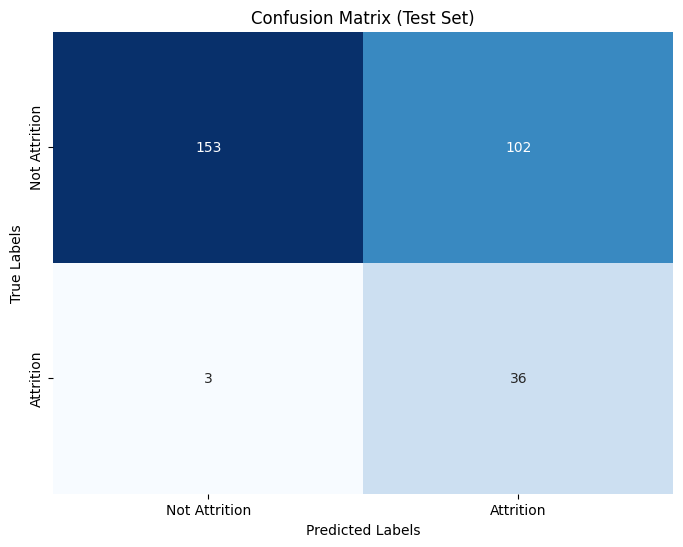

In [6]:
# Define CatBoost parameters
params = {
    'learning_rate': 0.1,               # Learning Rate
    'n_estimators': 100,                # Number of Trees
    'max_depth': 6,                     # Depth of Trees
    'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
    'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
    'subsample': 0.8,                   # Subsampling
    'loss_function': 'Logloss',         # Objective Function
    'eval_metric': 'Accuracy',                # Evaluation Metric
    'border_count': 128,                 # Gradient Estimation
    'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(**params)

# Train the model using KFold cross-validation
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []

for train_index, val_index in k_fold.split(x_train):
    X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Record end time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Predict on validation set
    y_pred = catboost_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, zero_division=0)
    recall = recall_score(y_val_fold, y_pred, zero_division=0)
    f1 = f1_score(y_val_fold, y_pred, zero_division=0)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Calculate average training time
avg_training_time = sum(training_times) / len(training_times)
print("Validation Average Accuracy:", avg_accuracy)
print("Validation Average F1 Score:", avg_f1_score)
print("Validation Average Precision:", avg_precision)
print("Validation Average Recall:", avg_recall)
print('-----------------------------------------------------')


# Predict labels for the test set
y_pred_test = catboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test F1 Score:", f1_score_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()

**Trying Resampling**

Random oversampling

In [9]:
# Random oversampling
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

Validation Average Accuracy: 0.8921568627450981
Validation Average F1 Score: 0.8980894660542935
Validation Average Precision: 0.8199273296806503
Validation Average Recall: 1.0
-----------------------------------------------------
Test Accuracy: 0.9285714285714286
Test F1 Score: 0.787878787878788
Test Precision: 0.65
Test Recall: 1.0


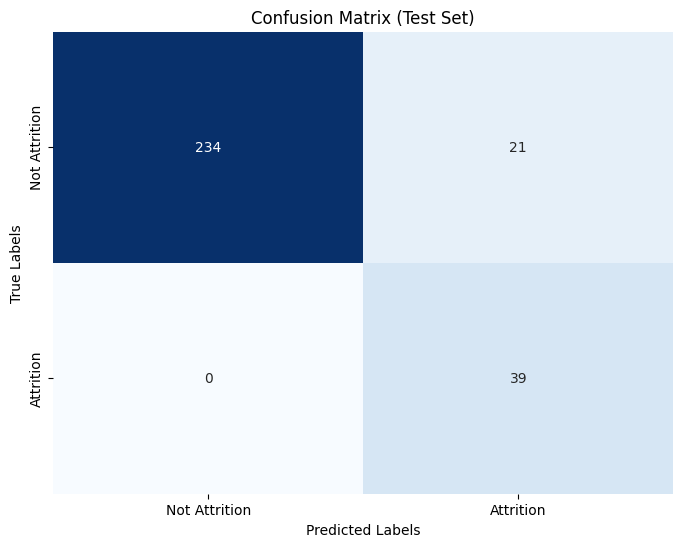

In [10]:
# Define CatBoost parameters
params = {
    'learning_rate': 0.1,               # Learning Rate
    'n_estimators': 100,                # Number of Trees
    'max_depth': 6,                     # Depth of Trees
    'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
    'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
    'subsample': 0.8,                   # Subsampling
    'loss_function': 'Logloss',         # Objective Function
    'eval_metric': 'Accuracy',                # Evaluation Metric
    'border_count': 128,                 # Gradient Estimation
    'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(**params)

# Train the model using KFold cross-validation
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []

for train_index, val_index in k_fold.split(x_train_resampled):
    X_train_fold, X_val_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Record end time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Predict on validation set
    y_pred = catboost_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, zero_division=0)
    recall = recall_score(y_val_fold, y_pred, zero_division=0)
    f1 = f1_score(y_val_fold, y_pred, zero_division=0)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Calculate average training time
avg_training_time = sum(training_times) / len(training_times)
print("Validation Average Accuracy:", avg_accuracy)
print("Validation Average F1 Score:", avg_f1_score)
print("Validation Average Precision:", avg_precision)
print("Validation Average Recall:", avg_recall)
print('-----------------------------------------------------')


# Predict labels for the test set
y_pred_test = catboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test F1 Score:", f1_score_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()

SMOTE

In [11]:
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Validation Average Accuracy: 0.8215686274509805
Validation Average F1 Score: 0.8467733918855046
Validation Average Precision: 0.7466155632293403
Validation Average Recall: 0.9965517241379309
-----------------------------------------------------
Test Accuracy: 0.8231292517006803
Test F1 Score: 0.59375
Test Precision: 0.42696629213483145
Test Recall: 0.9743589743589743


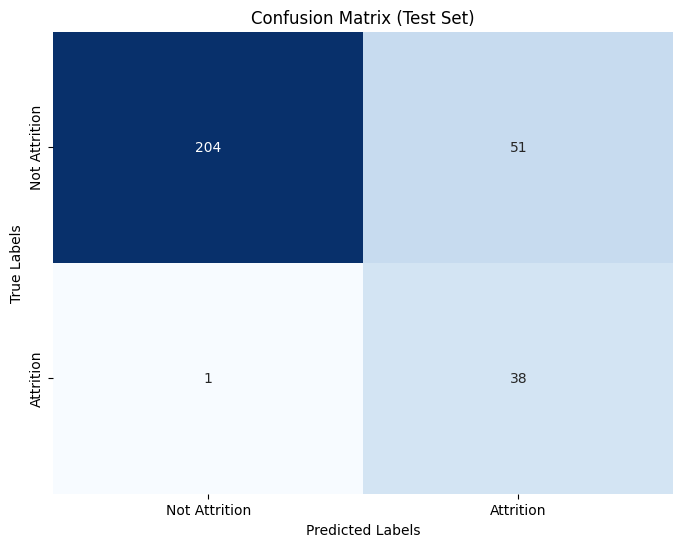

In [12]:
# Define CatBoost parameters
params = {
    'learning_rate': 0.1,               # Learning Rate
    'n_estimators': 100,                # Number of Trees
    'max_depth': 6,                     # Depth of Trees
    'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
    'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
    'subsample': 0.8,                   # Subsampling
    'loss_function': 'Logloss',         # Objective Function
    'eval_metric': 'Accuracy',                # Evaluation Metric
    'border_count': 128,                 # Gradient Estimation
    'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(**params)

# Train the model using KFold cross-validation
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []

for train_index, val_index in k_fold.split(x_train_resampled):
    X_train_fold, X_val_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Record end time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Predict on validation set
    y_pred = catboost_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, zero_division=0)
    recall = recall_score(y_val_fold, y_pred, zero_division=0)
    f1 = f1_score(y_val_fold, y_pred, zero_division=0)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Calculate average training time
avg_training_time = sum(training_times) / len(training_times)
print("Validation Average Accuracy:", avg_accuracy)
print("Validation Average F1 Score:", avg_f1_score)
print("Validation Average Precision:", avg_precision)
print("Validation Average Recall:", avg_recall)
print('-----------------------------------------------------')


# Predict labels for the test set
y_pred_test = catboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test F1 Score:", f1_score_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()

Random undersampling

In [13]:
# Random undersampling
undersampler = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

Validation Average Accuracy: 0.6392857142857142
Validation Average F1 Score: 0.7081135531135531
Validation Average Precision: 0.5727380952380952
Validation Average Recall: 1.0
-----------------------------------------------------
Test Accuracy: 0.3469387755102041
Test F1 Score: 0.2888888888888889
Test Precision: 0.16883116883116883
Test Recall: 1.0


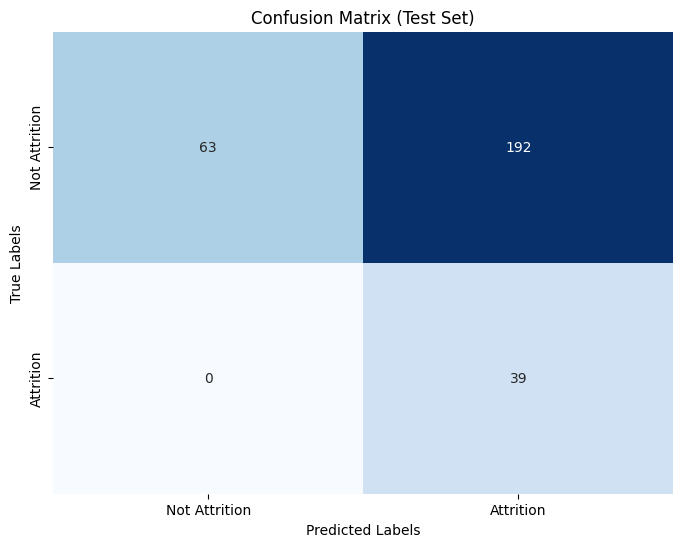

In [14]:
# Define CatBoost parameters
params = {
    'learning_rate': 0.1,               # Learning Rate
    'n_estimators': 100,                # Number of Trees
    'max_depth': 6,                     # Depth of Trees
    'l2_leaf_reg': 3,                   # Regularization Parameter: L2 regularization
    'min_child_samples': 5,             # Regularization Parameter: Minimum number of samples required to split a node
    'subsample': 0.8,                   # Subsampling
    'loss_function': 'Logloss',         # Objective Function
    'eval_metric': 'Accuracy',                # Evaluation Metric
    'border_count': 128,                 # Gradient Estimation
    'class_weights': [1, 10]  # Adjust class weights because of unbalanced classes
}

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(**params)

# Train the model using KFold cross-validation
accuracies = []
precisions = []
recalls = []
f1_scores = []
training_times = []

for train_index, val_index in k_fold.split(x_train_resampled):
    X_train_fold, X_val_fold = x_train_resampled.iloc[train_index], x_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    catboost_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Record end time
    end_time = time.time()
    
    # Calculate training time
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Predict on validation set
    y_pred = catboost_model.predict(X_val_fold)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, y_pred)
    precision = precision_score(y_val_fold, y_pred, zero_division=0)
    recall = recall_score(y_val_fold, y_pred, zero_division=0)
    f1 = f1_score(y_val_fold, y_pred, zero_division=0)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate and print average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Calculate average training time
avg_training_time = sum(training_times) / len(training_times)
print("Validation Average Accuracy:", avg_accuracy)
print("Validation Average F1 Score:", avg_f1_score)
print("Validation Average Precision:", avg_precision)
print("Validation Average Recall:", avg_recall)
print('-----------------------------------------------------')


# Predict labels for the test set
y_pred_test = catboost_model.predict(x_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test F1 Score:", f1_score_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()